In [1]:
import xarray as xr
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
feature_data = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRLradrefl_REFL.nc'
label_data   = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRL3D_maxW.nc'

In [3]:
def downscale_remove(feature, label):
    
    j=0
    a = np.zeros((len(feature)*4,128,128))
    b = np.zeros((len(feature)*4,128,128))
    
    for i in range(len(feature) - 1):
        if np.amax(feature[i,0:128,0:128]) != np.amin(feature[i,0:128,0:128]):
            a[j,:,:] = feature[i,0:128,0:128]
            b[j,:,:] = label[i,0:128,0:128]
            j = j+1
        if np.amax(feature[i,0:128,128:256]) != np.amin(feature[i,0:128,128:256]):
            a[j,:,:] = feature[i,0:128,128:256]
            b[j,:,:] = label[i,0:128,128:256]
            j = j+1
        if np.amax(feature[i,128:256,0:128]) != np.amin(feature[i,128:256,0:128]):
            a[j,:,:] = feature[i,128:256,0:128]
            b[j,:,:] = label[i,128:256,0:128]
            j = j+1
        if np.amax(feature[i,128:256,128:256]) != np.amin(feature[i,128:256,128:256]):
            a[j,:,:] = feature[i,128:256,128:256]
            b[j,:,:] = label[i,128:256,128:256]
            j = j+1

    print(j)

    return np.resize(a, (j,128,128)), np.resize(b, (j,128,128))


In [4]:
def downscale_remove_ag(feature, label, percentile):
    
    j=0
    a = np.zeros((len(feature)*4,128,128))
    b = np.zeros((len(feature)*4,128,128))
    
    for i in range(len(feature) - 1):
        if np.percentile(feature[i,0:128,0:128], percentile) >= 0:
            a[j,:,:] = feature[i,0:128,0:128]
            b[j,:,:] = label[i,0:128,0:128]
            j = j+1
        if np.percentile(feature[i,0:128,128:256], percentile) >= 0:
            a[j,:,:] = feature[i,0:128,128:256]
            b[j,:,:] = label[i,0:128,128:256]
            j = j+1
        if np.percentile(feature[i,128:256,0:128], percentile) >- 0:
            a[j,:,:] = feature[i,128:256,0:128]
            b[j,:,:] = label[i,128:256,0:128]
            j = j+1
        if np.percentile(feature[i,128:256,128:256], percentile) >= 0:
            a[j,:,:] = feature[i,128:256,128:256]
            b[j,:,:] = label[i,128:256,128:256]
            j = j+1

    print(j)

    return np.resize(a, (j,128,128)), np.resize(b, (j,128,128))


In [5]:
#
# load the data
#
fds = xr.open_dataset(feature_data)
lds = xr.open_dataset(label_data)
f = fds.refl.values
l = lds.maxW.values

In [6]:
print(f.shape)
print(l.shape)

(9568, 256, 256)
(9568, 256, 256)


In [7]:
f1 = f.copy()
l1 = l.copy()

In [ ]:
#
# min max scaling
#
# f[(l<0.1)&(f<25)]=-999
f[f<25] = 0

feature = (f - np.amin(f)) / (np.amax(f) - np.amin(f))

In [ ]:
l[l<1.0]=0

#label = np.log10(l)

# l[(l<0.1)&(f<25)]=-999
label = (l - np.amin(l)) / (np.amax(l) - np.amin(l))


In [ ]:
print(feature.shape)

In [ ]:
print(label.shape)

In [ ]:
#
# write feature_data
#
output_data = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_REFL.nc'
srefl = xr.DataArray(feature, name='refl')
encoding={'refl': {'zlib': True, '_FillValue': -99.0}}
srefl.to_netcdf(output_data, encoding=encoding)

In [ ]:
#
# write label_data
#
output_data = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_maxW.nc'
lmaxW = xr.DataArray(label, name='maxW')
encoding={'maxW': {'zlib': True, '_FillValue': -99.0}}
lmaxW.to_netcdf(output_data, encoding=encoding)

In [8]:
print(f1.shape)
print(l1.shape)

(9568, 256, 256)
(9568, 256, 256)


In [9]:
# DS_feature, DS_label = downscale_remove(f1, l1)
DS_feature, DS_label = downscale_remove_ag(f1, l1, 95)

12250


In [10]:
print(DS_feature.shape)
print(DS_label.shape)

print()
print("min DS_Feature:",np.amin(DS_feature))
print()
print("90th feature:",np.percentile(f1,90.0))
print("90th DS_Feature:",np.percentile(DS_feature,90.0))
print()
print("99.9th feature:",np.percentile(f1,99.9))
print("99.9th DS_Feature:",np.percentile(DS_feature,99.9))
print()
print("mean feature:",np.mean(f1))
print("mean DS_Feature:",np.mean(DS_feature))
print()


(12250, 128, 128)
(12250, 128, 128)

min DS_Feature: -35.0

90th feature: -35.0
90th DS_Feature: 16.705747604370117

99.9th feature: 41.73642941665685
99.9th DS_Feature: 45.360721588134766

mean feature: -31.113676
mean DS_Feature: -24.02667184090167



In [11]:
DS_feature = (DS_feature - np.amin(DS_feature)) / (np.amax(DS_feature) - np.amin(DS_feature))
DS_label = (DS_label - np.amin(DS_label)) / (np.amax(DS_label) - np.amin(DS_label))

In [12]:
print("min DS_Feature:",np.amin(DS_feature))
print()
print("50th DS_Feature:",np.percentile(DS_feature,50.0))
print()
print("99.9th DS_Feature:",np.percentile(DS_feature,99.9))
print()
print("mean DS_Feature:",np.mean(DS_feature))

min DS_Feature: 0.0

50th DS_Feature: 0.0

99.9th DS_Feature: 0.8810781601489119

mean DS_Feature: 0.12031200808127257


In [13]:
plt_number = 371
fi = DS_feature[plt_number,:,:]
li = DS_label[plt_number,:,:]

0.000423171072806176 0.08654365765026535 0.0016805441985313263 0.061484304154542126


<Figure size 432x288 with 0 Axes>

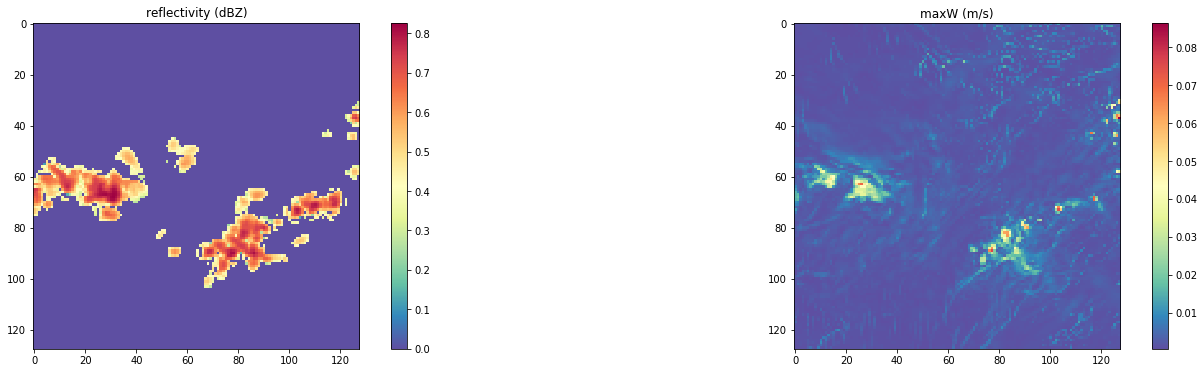

In [14]:
cmap = plt.cm.Spectral_r
plt.clf()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,6)) 

max_ref = np.amax(fi[:,:])
p_ref = np.percentile(fi[:,:], 99.9)

ref = ax1.imshow(fi, cmap=cmap)
ax1.set_title("reflectivity (dBZ)")
#ref.set_clim(vmin=0, vmax=max_ref)
ref.set_clim()
fig.colorbar(ref, ax=ax1, orientation='vertical', label='')

max_maxW = np.amax(li[:,:])
min_maxW = np.amin(li[:,:])
p_maxW = np.percentile(li[:,:], 99.9)
pmin_maxW = np.percentile(li[:,:], 35.0)
print(min_maxW, max_maxW, pmin_maxW, p_maxW)

maxW = ax2.imshow(li, cmap=cmap)
ax2.set_title("maxW (m/s)")
#maxW.set_clim(vmin=0, vmax=p_maxW)
maxW.set_clim()
fig.colorbar(maxW, ax=ax2)

In [ ]:
#
# Split these files into training, validation, and testing?
#

In [15]:
#
# write downscaled feature_data
#
output_data = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_REFL.nc'
srefl = xr.DataArray(DS_feature, name='refl')
encoding={'refl': {'zlib': True, '_FillValue': 0.0}}
srefl.to_netcdf(output_data, encoding=encoding)

In [16]:
#
# write downscaled label_data
#
output_data = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_maxW.nc'
lmaxW = xr.DataArray(DS_label, name='maxW')
encoding={'maxW': {'zlib': True, '_FillValue': 0.0}}
lmaxW.to_netcdf(output_data, encoding=encoding)

In [17]:
print("DONE")

DONE
